In [1]:
import os
import sys

import numpy as np
from nipype import config
import matplotlib.pyplot as plt # plotting
from matplotlib import pyplot # plotting
from pandas import read_csv # plotting
from nilearn import image, plotting # plotting
#from tqdm.notebook import tqdm

from os.path import pardir
sys.path.append(pardir)
from ica_wf import make_subject_ica_wf

220628-10:46:15,661 nipype.utils WARNING:
	 A newer version (1.8.1) of nipy/nipype is available. You are using 1.7.1


/LOCAL/jzerbe/testenv/lib/python3.6/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.6 support is deprecated and will be removed in release 0.10 of Nilearn. Consider switching to Python 3.8 or 3.9.
  _python_deprecation_warnings()


In [ ]:
config.enable_debug_mode()

### Run preproc + ICA workflow

In [ ]:
# create workflow
melodicwf = make_subject_ica_wf()

In [ ]:
# hardcoded paths
bold_file = "/LOCAL/jzerbe/faces_vs_houses/ds002938/derivatives/fmriprep/sub-08/func/sub-08_task-effort_space-T1w_desc-preproc_bold.nii.gz"
mask_file = "/LOCAL/jzerbe/faces_vs_houses/ds002938/derivatives/fmriprep/sub-08/func/sub-08_task-effort_space-T1w_desc-brain_mask.nii.gz"
out_dir = "/LOCAL/jzerbe/temp_results/melodic/sub-08_task-effort_space-T1w_melodic"

# parameter
p_tr = 1.5
p_hpf_sec =120.0
p_hpf = float(p_hpf_sec/p_tr)
p_fwhm = 4.0
base_dir = "/LOCAL/jzerbe/temp_results"

In [ ]:
# feed input to workflow & run
melodicwf.inputs.inputspec.bold_file = bold_file
melodicwf.inputs.inputspec.mask_file = mask_file
melodicwf.inputs.inputspec.hpf = p_hpf
melodicwf.inputs.inputspec.tr = p_tr
melodicwf.inputs.inputspec.fwhm = p_fwhm
melodicwf.inputs.inputspec.out_dir = out_dir
melodicwf.base_dir = base_dir

melodicwf.run()

### Plotting results

In [40]:
# hardcoded paths
sub = 'sub-10'
melodicimg = f'/LOCAL/jzerbe/faces_vs_houses/ds002938/derivatives/melodic/{sub}/{sub}_task-1back_space-T1w_melodic/melodic_IC.nii.gz'
anatimg = f'/LOCAL/jzerbe/faces_vs_houses/ds002938/derivatives/fmriprep/{sub}/anat/{sub}_desc-preproc_T1w.nii.gz'
ic_file = f'/LOCAL/jzerbe/faces_vs_houses/ds002938/derivatives/melodic/{sub}/{sub}_task-1back_space-T1w_melodic/melodic_ICstats.txt'

# Volumes:  37


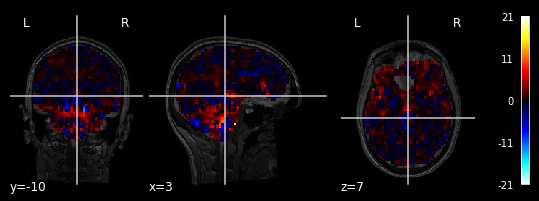

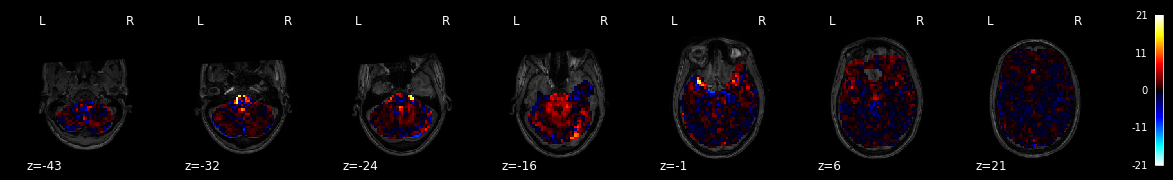

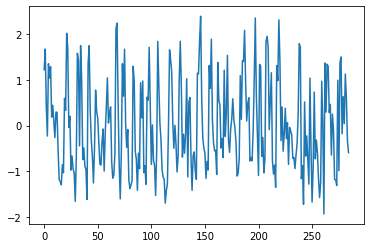

In [43]:
# coronal, horizontal & sagital
print('# Volumes: ', image.load_img(melodicimg).shape[3]) # nr of volumes
volume = image.index_img(melodicimg, 2) #0
img_ortho = plotting.plot_stat_map(volume, bg_img=anatimg, display_mode='ortho')
plt.show()

# multiple horizontal
img_z = plotting.plot_stat_map(volume, bg_img=anatimg, display_mode='z')
plt.show()

# IC signal shape
ic_file = f'/LOCAL/jzerbe/faces_vs_houses/ds002938/derivatives/melodic/{sub}/{sub}_task-1back_space-T1w_melodic/melodic_mix'
ic = np.loadtxt(ic_file)
plt.plot(ic[:,2]) #0

In [ ]:
# interactive
plotting.view_img(volume, bg_img=anatimg, threshold=2, vmax=4, cut_coords=[-42, -16, 52], title="")